Load data

In [39]:
# Import libraries
import pandas as pd
import numpy as np

In [2]:
# Read data
df = pd.read_excel("housing.xlsx")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [4]:
# Extract input and output variables from the dataset
x = df.iloc[:, 0:9]
y = df.iloc[:,9]

In [5]:
# Check the input variable values
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY


In [6]:
# Check the output variable values
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

Handle missing data

In [7]:
# Find columns with missing values
df.info()

# total_bedrooms is the only column with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
# Fill the missing values of total_bedrooms with its mean
mean_total_bedrooms = df["total_bedrooms"].mean()
x["total_bedrooms"].fillna(value=mean_total_bedrooms, inplace=True) 
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 1.4+ MB


Encode categorical data

In [10]:
# One-hot encoding to create dummy variables for ocean_proximity (categorical feature)
placements = pd.get_dummies(x["ocean_proximity"],prefix_sep='_',prefix='placement')
placements.head()

,placement_<1H OCEAN,placement_INLAND,placement_ISLAND,placement_NEAR BAY,placement_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [11]:
# Merge the two dataframes and drop the ocean_proximity column
x = (x.drop(["ocean_proximity"], axis=1)).join(placements)
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,placement_<1H OCEAN,placement_INLAND,placement_ISLAND,placement_NEAR BAY,placement_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


Splitting the dataset

In [12]:
# Split data into training and testing data - 80% training set, 20% test set
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.2, train_size=0.8)

Standardizing data

In [17]:
# Standardize training and test sets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standardized_x_train = scaler.fit_transform(x_train)
standardized_x_test = scaler.fit_transform(x_test)

# Reshape y in order to perform standardization, otherwise we will get an error
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

standardized_y_train = scaler.fit_transform(y_train)
standardized_y_test = scaler.fit_transform(y_test)

Linear Regression

In [29]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Fit the model
lr.fit(standardized_x_train, standardized_y_train)

# Predict the output for the standardized test dataset
y_pred = lr.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
# Print the intercept and coefficient of the linear regression equation of this model
print("Coefficients of the linear regression equation:", lr.coef_)
print("Intercept of the linear regression equation:", lr.intercept_)

Coefficients of the linear regression equation: [[-0.46063785 -0.47032468  0.11387482 -0.09552259  0.2535276  -0.38565116
   0.26748867  0.63957254  0.05061745 -0.10740648  0.0253264   0.02219891
   0.05229552]]
Intercept of the linear regression equation: [-7.81717125e-16]


In [31]:
# Mean Squared Error (MSE) of linear regression
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred, standardized_y_test)
print("MSE:", mse)

MSE: 402985.88067482563


Decision Tree Regression

In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

# Fit the model
dt.fit(standardized_x_train, standardized_y_train)

# Predict the output for the standardized test dataset
y_pred = dt.predict(standardized_x_test)

In [33]:
# Root Mean Squared Error (RMSE) of Decision Tree
from math import sqrt
rmse = sqrt(mean_squared_error(y_pred, standardized_y_test))
print("RMSE:", rmse)

RMSE: 0.6808269367854592


Random Forest Regression

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model
rf.fit(standardized_x_train, np.ravel(standardized_y_train))

# Predict the output for the standardized test dataset
y_pred = rf.predict(standardized_x_test)

In [38]:
# Root Mean Squared Error (RMSE) of Random Forest
rmse = sqrt(mean_squared_error(y_pred, standardized_y_test))
print("RMSE:", rmse)

RMSE: 0.4766704961282116


Linear Regression with one independent variable

In [75]:
# Extract "median_income" column from the independent variable training and test sets
median_income_train = standardized_x_train[:,7]              # median_income is the column with index 7
median_income_test = standardized_x_test[:,7]

# Fit the linear regression model
lr.fit(median_income_train.reshape(-1, 1), standardized_y_train)       # reshape is used to create an array

# Predict the output for the standardized median income
y_pred = lr.predict(median_income_test.reshape(-1, 1))

In [76]:
# Print the intercept and coefficient of the linear regression equation of this model
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [[0.69180307]]
Intercept: [-5.06344401e-17]


In [77]:
# Import needed libraries for plot
import matplotlib.pyplot as plt
%matplotlib inline

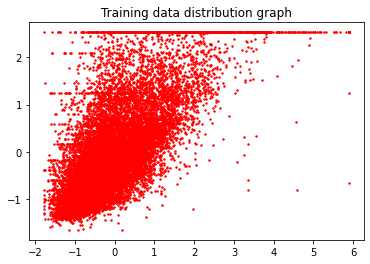

In [91]:
# Training data plot
plt.title("Training data distribution graph")
plt.scatter(median_income_train.reshape(-1, 1), standardized_y_train, color="red", s=2)
plt.show()

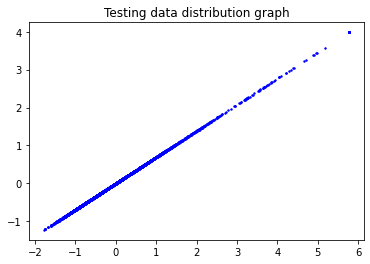

In [89]:
# Testing data plot
plt.title("Testing data distribution graph")
plt.scatter(median_income_test.reshape(-1, 1), y_pred, color="blue", s=2)
plt.show()

# We can clearly see that the fitted model satisfies the test data